# Description


Name : K.S,SUH

Date: 2017.07.14 KST(seoul) 12:37 AM

In this activity, I am going to use a simple classification determine target outcome values. I will demonstrate how to assess the accuracy of the classification predictions and have a look at some of evaluation process with visualization.

There are two seperate Parts.



# PART 1 : A simple classification

## Import required modules and load data file

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('train.csv')

In [5]:
df.head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
0,56,0.005737,iPhone,M,0,62717,2,1,4,0
1,50,0.004733,desktop,F,0,64328,2,3,2,0
2,54,0.004129,laptop,M,0,83439,1,3,7,0
3,16,0.005117,Android,F,0,30110,2,3,0,0
4,37,0.003635,desktop,M,0,76565,2,1,5,0


## Examining the data

<IPython.core.display.Javascript object>


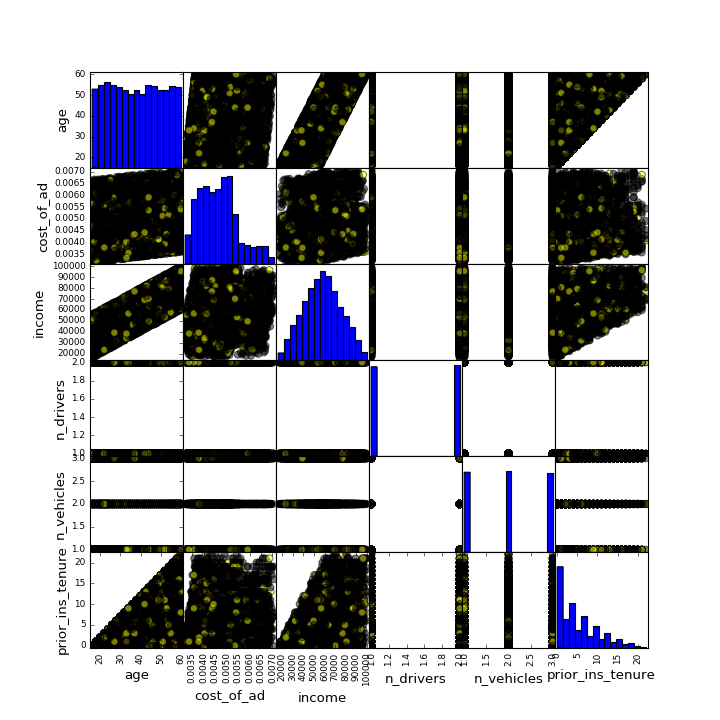

In [10]:
from matplotlib import cm
X = df[['age', 'cost_of_ad','income','n_drivers','n_vehicles','prior_ins_tenure']]
y = df['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

<IPython.core.display.Javascript object>


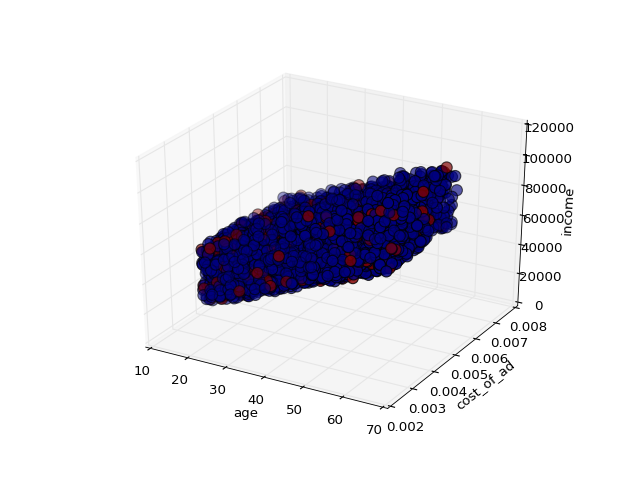

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['age'], X_train['cost_of_ad'],X_train['income'],c = y_train, marker = 'o', s=100)
ax.set_xlabel('age')
ax.set_ylabel('cost_of_ad')
ax.set_zlabel('income')

plt.show()


## Create train-test split

In [17]:
# For this example, we use the mass, width, and height features of each fruit instance
X = df[['age', 'cost_of_ad', 'income','n_drivers','n_vehicles','prior_ins_tenure']]
y = df['outcome']

,
# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Create classifier object

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

## Train the classifier (fit the estimator) using the training data

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Estimate the accuracy of the classifier on future data, using  the test data

In [21]:
knn.score(X_test, y_test)

0.88519999999999999


## Use the trained k-NN classifier model to classify first 5 objects from test.csv

In [51]:
prediction = knn.predict([[34, 0.005133656, 40376, 1,3,7]])
prediction[0]


#'age', 'cost_of_ad', 'income','n_drivers','n_vehicles','prior_ins_tenure'

0

In [53]:
prediction = knn.predict([[53, 0.005223345, 84511, 1,1,11]])
prediction[0]

0

In [54]:
prediction = knn.predict([[46, 0.004938677, 79322, 1,1,4]])
prediction[0]

0

In [56]:
prediction = knn.predict([[36, 0.004924013, 63295, 1,2,0]])
prediction[0]

0

In [57]:
prediction = knn.predict([[28, 0.005146137, 36170, 1,3,3]])
prediction[0]

0

# PART 2:  Evaluation

## Evaluation for Classification

In [38]:
# Creating a dataset with imbalanced binary classes:  
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    1
27    0
28    0
29    0
Name: outcome, dtype: int64
New binary labels:	 1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    1
27    0
28    0
29    0
Name: outcome, dtype: int64


In [39]:
np.bincount(y_binary_imbalanced)    # Negative class (0) is the most frequent class

array([9018,  982])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.89000000000000001

## Dummy Classifiers
DummyClassifier is a classifier that makes predictions using simple rules, which can be useful as a baseline for comparison against actual classifiers, especially with imbalanced classes.

In [41]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
dummy_majority.score(X_test, y_test)

0.89000000000000001

In [43]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.89000000000000001

## Confusion matrices

Binary (two-class) confusion matrix

In [64]:
from sklearn.metrics import confusion_matrix

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[2225    0]
 [ 275    0]]


In [29]:
# produces random predictions w/ same class proportion as training set
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[2003  222]
 [ 244   31]]


In [30]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[2225    0]
 [ 275    0]]


In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[2225    0]
 [ 275    0]]


In [33]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[2225    0]
 [ 275    0]]


## Evaluation metrics for binary classification

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 0.89
Precision: 0.00
Recall: 0.00
F1: 0.00


/home/suh/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/suh/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       0.89      1.00      0.94      2225
          1       0.00      0.00      0.00       275

avg / total       0.79      0.89      0.84      2500



/home/suh/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [45]:
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('Logistic regression\n', 
      classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

Random class-proportional (dummy)
              precision    recall  f1-score   support

      not 1       0.89      0.90      0.90      2225
          1       0.12      0.11      0.12       275

avg / total       0.81      0.81      0.81      2500

SVM
              precision    recall  f1-score   support

      not 1       0.89      1.00      0.94      2225
          1       0.00      0.00      0.00       275

avg / total       0.79      0.89      0.84      2500

Logistic regression
              precision    recall  f1-score   support

      not 1       0.89      1.00      0.94      2225
          1       0.00      0.00      0.00       275

avg / total       0.79      0.89      0.84      2500

Decision tree
              precision    recall  f1-score   support

      not 1       0.89      1.00      0.94      2225
          1       0.00      0.00      0.00       275

avg / total       0.79      0.89      0.84      2500



/home/suh/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Decision functions

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

[(0, -1.7385257323878562),
 (0, -2.747015946812196),
 (0, -1.5887203207888905),
 (0, -1.9914795794556845),
 (0, -2.7323728285746687),
 (0, -0.78413845763753098),
 (0, -2.8295207363428001),
 (0, -1.4221493768632589),
 (0, -2.4063892057515592),
 (0, -2.2518411597185688),
 (0, -0.94355793484449568),
 (0, -1.9856071511130959),
 (0, -1.3771418223720104),
 (0, -2.2077642036674225),
 (0, -3.3067856572598666),
 (0, -1.6203463477576803),
 (0, -2.5405857193459562),
 (0, -3.4667353150558471),
 (0, -1.9615282323640393),
 (0, -1.5415363025796831)]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

[(0, 0.14950029074305349),
 (0, 0.060255399688333336),
 (0, 0.16956401501176996),
 (0, 0.12010041806645777),
 (0, 0.061089920429169511),
 (0, 0.31342863982140939),
 (0, 0.055749621764124284),
 (0, 0.19432485023258333),
 (0, 0.082686783350039525),
 (0, 0.095190768524192823),
 (0, 0.28018221689149164),
 (0, 0.12072238037953177),
 (0, 0.20146842790193256),
 (0, 0.09905542456294783),
 (0, 0.035339133534117786),
 (0, 0.16515711014061513),
 (0, 0.073061496529190181),
 (0, 0.030273676598769474),
 (0, 0.12330175291995125),
 (0, 0.17631205256693511)]

## Precision-recall curves

<IPython.core.display.Javascript object>


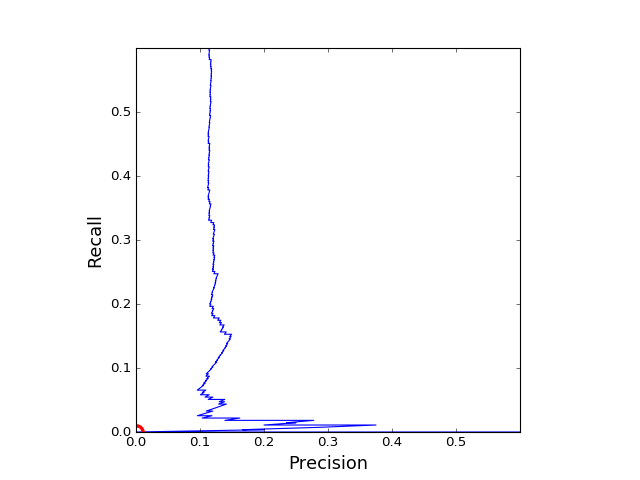

In [60]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 0.6])
plt.ylim([0.0, 0.6])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

## ROC curves, Area-Under-Curve (AUC)

<IPython.core.display.Javascript object>


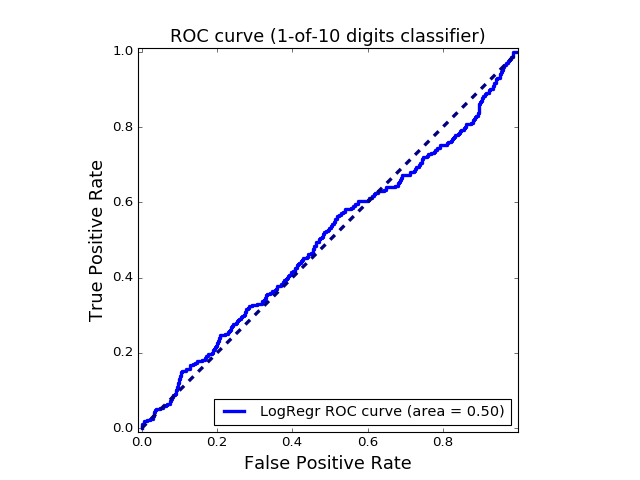

In [61]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

<IPython.core.display.Javascript object>


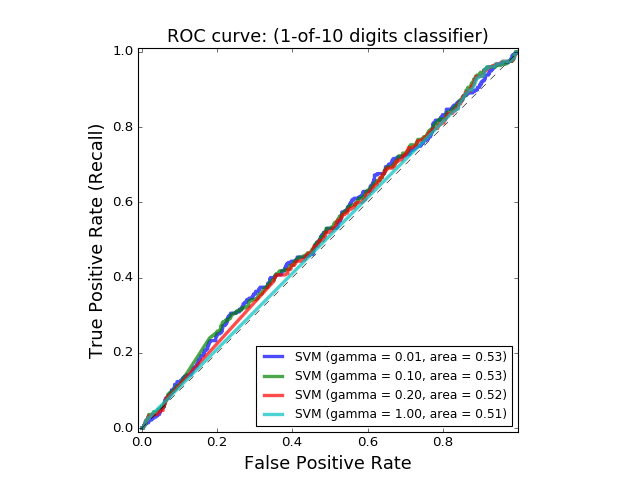

gamma = 0.01  accuracy = 0.89   AUC = 0.53
gamma = 0.10  accuracy = 0.89   AUC = 0.53
gamma = 0.20  accuracy = 0.89   AUC = 0.52
gamma = 1.00  accuracy = 0.89   AUC = 0.51


In [62]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()